In [764]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [765]:
df = pd.read_csv('./dataverse_files/mmALL_073119_csv.csv')

In [766]:
df.shape

(16363, 31)

In [767]:
pd.set_option('display.max_columns',None)

In [768]:
# Thinking stateresponse numbers for classification
# Chose not to use dummies in this case

# stateresponse_codes = {'accomodation':1,'ignore':2,'arrests':3,'crowd dispersal':4,
#                        'shootings':5,'beatings':6,'killings':7}

# protesterdemand_codes = {'political behavior, process':1,
#                          'labor wage dispute':2,
#                          'price increases, tax policy':3,
#                          'removal of politician':4,
#                          'police brutality':5,'land farm issue':6,
#                          'social restrictions':7}

# for col in df.columns:
#     if 'demand' in col:
#         df[col] = df[col].map(protesterdemand_codes)

# for col in df.columns:
#     if 'response' in col:
#         df[col] = df[col].map(stateresponse_codes)

In [769]:
df.head(1)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...


In [770]:
# some engineering for protest length by total days

df['years'] = df['endyear'] - df['startyear']
df['months'] = df['endmonth'] - df['startmonth']
df['days'] = df['endday'] - df['startday']

df['total_days'] = df['days'] + (df['months']*30.5) + (df['years']*365)

In [771]:
# df['country'].value_counts().head(15)

In [772]:
df['protesterdemand1'].value_counts().head(15)

political behavior, process    9181
labor wage dispute             1667
price increases, tax policy    1059
removal of politician           950
police brutality                785
land farm issue                 448
social restrictions             413
Name: protesterdemand1, dtype: int64

In [773]:
df.groupby(['protesterdemand1','stateresponse1','protest']).count().head(25)

id  country  ccode  \
protesterdemand1            stateresponse1  protest                         
labor wage dispute          accomodation    1         205      205    205   
                            arrests         1          70       70     70   
                            beatings        1          23       23     23   
                            crowd dispersal 1         326      326    326   
                            ignore          1        1006     1006   1006   
                            killings        1           8        8      8   
                            shootings       1          23       23     23   
land farm issue             accomodation    1          49       49     49   
                            arrests         1          28       28     28   
                            beatings        1           6        6      6   
                            crowd dispersal 1         111      111    111   
                            ignore          1         234      234    234   
                            killings        1           7        7      7   
                            shootings       1          12       12     12   
police brutality            accomodation    1          51       51     51   
                            arrests         1          63       63     63   
                            beatings        1          35       35     35   
                            crowd dispersal 1         270      270    270   
                            ignore          1         296      296    296   
                            killings        1          20       20     20   
                            shootings       1          47       47     47   
political behavior, process accomodation    1         432      432    432   
                            arrests         1         704      704    704   
                            beatings        1         198      198    198   
                            crowd dispersal 1        2334     2334   2334   

                                                     year  region  \
protesterdemand1            stateresponse1  protest                 
labor wage dispute          accomodation    1         205     205   
                            arrests         1          70      70   
                            beatings        1          23      23   
                            crowd dispersal 1         326     326   
                            ignore          1        1006    1006   
                            killings        1           8       8   
                            shootings       1          23      23   
land farm issue             accomodation    1          49      49   
                            arrests         1          28      28   
                            beatings        1           6       6   
                            crowd dispersal 1         111     111   
                            ignore          1         234     234   
                            killings        1           7       7   
                            shootings       1          12      12   
police brutality            accomodation    1          51      51   
                            arrests         1          63      63   
                            beatings        1          35      35   
                            crowd dispersal 1         270     270   
                            ignore          1         296     296   
                            killings        1          20      20   
                            shootings       1          47      47   
political behavior, process accomodation    1         432     432   
                            arrests         1         704     704   
                            beatings        1         198     198   
                            crowd dispersal 1        2334    2334   

                                                     protestnumber  startday  \
protesterdemand1            sta

In [774]:
df['protesterdemand1'].isnull().count()

16363

In [775]:
df['stateresponse2'].value_counts()

arrests            692
crowd dispersal    568
accomodation       382
beatings           370
shootings          360
killings           311
ignore              33
Name: stateresponse2, dtype: int64

In [776]:
df['stateresponse3'].value_counts()

arrests            214
crowd dispersal    207
killings           175
accomodation        92
beatings            80
shootings           72
ignore              10
Name: stateresponse3, dtype: int64

In [777]:
df['stateresponse4'].value_counts()

accomodation       64
arrests            50
crowd dispersal    40
killings           38
beatings           19
shootings          19
Name: stateresponse4, dtype: int64

In [778]:
df['protesterdemand1'].value_counts()

political behavior, process    9181
labor wage dispute             1667
price increases, tax policy    1059
removal of politician           950
police brutality                785
land farm issue                 448
social restrictions             413
Name: protesterdemand1, dtype: int64

In [779]:
df['protesterdemand2'].value_counts()

political behavior, process    973
removal of politician          603
labor wage dispute             417
price increases, tax policy    201
social restrictions            201
police brutality               181
land farm issue                100
Name: protesterdemand2, dtype: int64

In [780]:
df['protesterdemand3'].value_counts()

price increases, tax policy    111
labor wage dispute              60
removal of politician           56
political behavior, process     35
police brutality                28
social restrictions             14
land farm issue                 12
Name: protesterdemand3, dtype: int64

In [781]:
df['protesteridentity'].value_counts()

protesters                               1300
students                                  490
unspecified                               224
workers                                   223
farmers                                   187
                                         ... 
Teachers, miners, and students              1
El Zakzaky supporters                       1
hard core opposition protesters             1
Militant supporters of the Parliament       1
Jomoro Youth Association                    1
Name: protesteridentity, Length: 5808, dtype: int64

In [782]:
df['protesterviolence'].value_counts()

0.0    11217
1.0     3816
Name: protesterviolence, dtype: int64

In [783]:
df['stateresponse7'].value_counts()

.               913
accomodation      3
arrests           2
killings          1
beatings          1
Name: stateresponse7, dtype: int64

In [784]:
df[df['protest'] == 0].shape

(1849, 35)

In [785]:
df.groupby(['stateresponse1','protesterdemand1'])['country'].count()

stateresponse1   protesterdemand1           
accomodation     labor wage dispute              205
                 land farm issue                  49
                 police brutality                 51
                 political behavior, process     432
                 price increases, tax policy      82
                 removal of politician            90
                 social restrictions              28
arrests          labor wage dispute               70
                 land farm issue                  28
                 police brutality                 63
                 political behavior, process     704
                 price increases, tax policy      98
                 removal of politician            57
                 social restrictions              27
beatings         labor wage dispute               23
                 land farm issue                   6
                 police brutality                 35
                 political behavior, process     198
 

In [786]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [787]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...,0.0,0.0,0.0,0.0
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...,0.0,0.0,0.0,0.0
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema...",0.0,0.0,0.0,0.0
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...,0.0,2.0,-6.0,55.0
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...,0.0,0.0,1.0,1.0


In [788]:
df[df['country'] == 'Cuba'].shape

(120, 35)

In [789]:
df.shape

(16363, 35)

In [790]:
df.sort_values(by='protestnumber',ascending=False).groupby('country').count()

,id,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,55,55,55,55,55,55,38,38,38,38,38,38,54,38,26,54,31,38,7,0,7,38,5,0,0,7,0,5,38,38,38,38,38,38
Albania,82,82,82,82,82,82,67,67,67,67,67,67,67,67,67,67,67,67,12,0,18,67,26,2,0,18,0,1,67,67,67,67,67,67
Algeria,74,74,74,74,74,74,58,58,58,58,58,58,71,58,35,71,58,58,27,0,20,58,5,0,0,20,0,3,58,58,58,58,58,58
Angola,37,37,37,37,37,37,23,23,23,23,23,23,23,23,23,23,23,23,1,0,2,23,8,1,0,2,0,3,23,23,23,23,23,23
Argentina,116,116,116,116,116,116,112,112,112,112,112,112,113,112,19,113,84,112,6,0,7,111,24,5,0,7,0,5,112,112,112,112,112,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,35,35,35,35,35,35,19,19,19,19,19,19,31,19,4,31,19,19,6,2,2,19,9,1,0,2,0,1,19,18,19,19,19,19
Yemen,165,165,165,165,165,165,157,157,157,157,157,157,162,157,45,162,92,157,71,4,2,157,46,17,5,3,1,11,157,157,157,157,157,157
Yugoslavia,138,138,138,138,138,138,137,137,137,137,137,137,137,137,136,137,137,137,50,8,3,137,33,13,5,0,0,0,137,137,137,137,137,137


In [791]:
df.groupby(['country','protest'])['protestnumber'].sum()

country      protest
Afghanistan  0             0
             1           107
Albania      0             0
             1           265
Algeria      0             0
                        ... 
Yugoslavia   1          1328
Zambia       0             0
             1           309
Zimbabwe     0             0
             1           420
Name: protestnumber, Length: 321, dtype: int64

In [792]:
region_protests = pd.DataFrame(df.groupby(['region','protest'])['protestnumber'].sum())
region_protests = region_protests.loc[region_protests['protestnumber'] != 0]
region_protests = region_protests.sort_values(by='protestnumber',ascending=False)
region_protests.T

region,Europe,Africa,Asia,South America,MENA,North America,Central America,Oceania
protest,1,1,1,1,1,1,1,1
protestnumber,48659,26904,21578,7771,7022,3699,1612,72


In [793]:
pd.DataFrame(df.groupby(['country','protest']).sum().sort_values(by='protestnumber',ascending=False)['protestnumber']).head(25).T

country,Kenya,Ireland,France,United Kingdom,Germany,Bangladesh,Ukraine,Greece,Romania,South Korea,Nigeria,Yemen,Venezuela,China,Cuba,Kyrgyzstan,Thailand,Namibia,Madagascar,Brazil,Nepal,Yugoslavia,Bulgaria,USSR,South Africa
protest,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
protestnumber,12662,7188,6984,6004,5421,4966,4330,3322,3295,3188,2578,2534,2314,2245,2143,2006,1783,1684,1439,1426,1353,1328,1263,1155,1066


In [794]:
df.drop(columns=['id','sources','notes'],inplace=True)

In [795]:
df.head()

,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,years,months,days,total_days
0,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,-6.0,55.0
4,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0


In [796]:
# including start day for protest duration
df['total_days'] = df['total_days'] + 1

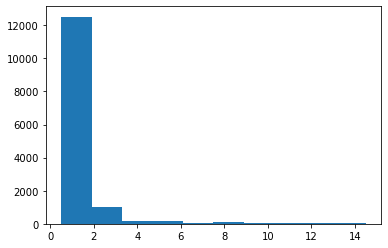

In [797]:
plt.hist(other['total_days'],bins=10);

In [798]:
# create dummy columns with recognizable column names

protest_demands = ['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']
state_responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
                   'stateresponse5', 'stateresponse6', 'stateresponse7']

def get_dum_cols(df, list_of_columns):
    list_of_dfs = []
    
    for col in list_of_columns:
        col_df = pd.get_dummies(df[col])
        list_of_dfs.append(col_df)
        
    #combine all df's vertically, so only areas with null values are where a potential column was empty    
    dfs_concat = pd.concat(list_of_dfs, axis = 0).fillna(0)
    
    #convert the concatenated df with all values now filled in into a list of separate dfs - each with all columns
    num_dfs = len(list_of_columns)
    num_rows = len(df)
    list_of_final_dfs = []
    
    for i in range(num_dfs):
        new_df = dfs_concat[num_rows*i : num_rows*(i+1)]
        list_of_final_dfs.append(new_df)
        
    # create combined final df
    final_df = list_of_final_dfs[0]
    
    for j in range(1, len(list_of_final_dfs)):
        final_df += list_of_final_dfs[j]
    return final_df

In [799]:
response_cats = get_dum_cols(df,state_responses)

demand_cats = get_dum_cols(df,protest_demands)

df = pd.concat([df,demand_cats,response_cats],axis=1)

df = df[df['protest'] == 1].copy()

other = df[df['total_days'] < 15]

In [800]:
# df_all = pd.concat([df, df_protest_demands_group, df_state_response_group], axis = 1)
# df_all.set_index('id', inplace=True)
# df_all.to_csv('df_all.csv', index = False)

In [801]:
df['shootings'].isnull().sum()

0

In [802]:
df['accomodation'].value_counts()

0    13022
1     1481
2       11
Name: accomodation, dtype: int64

In [803]:
df[df['years'] > 1]

,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,years,months,days,total_days,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,.,accomodation,arrests,beatings,crowd dispersal,ignore,killings,shootings,.
6150,Greece,350,2013,Europe,1,13,22.0,7.0,2013.0,11.0,5.0,2015.0,0.0,Athens,100-999,100s,state paid cleaning ladies,labor wage dispute,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,.,2.0,-2.0,-11.0,659.0,1,0,0,0,0,0,0.0,0.0,1,0,0,0.0,0.0,0,0.0,1.0
11631,Morocco,600,2011,MENA,1,5,1.0,7.0,2011.0,24.0,1.0,2014.0,0.0,Imider,50-99,>50,"protesters, students, locals, women, villagers...","political behavior, process","price increases, tax policy",NaN,NaN,killings,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-6.0,23.0,936.0,0,0,0,1,1,0,0.0,0.0,0,0,0,0.0,0.0,1,0.0,0.0
14531,India,750,2014,Asia,1,11,3.0,6.0,2014.0,3.0,6.0,2016.0,1.0,"Jawahar Bagh, a public garden in the city of M...",2000-4999,"About 2,000 people",A group that was calling for higher gasoline s...,"political behavior, process","price increases, tax policy",NaN,NaN,crowd dispersal,killings,shootings,NaN,NaN,NaN,NaN,2.0,0.0,0.0,731.0,0,0,0,1,1,0,0.0,0.0,0,0,0,1.0,0.0,1,1.0,0.0


In [804]:
df[df['months'] > 1].sort_values(by='months',ascending=False).head(25)

,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,years,months,days,total_days,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,.,accomodation,arrests,beatings,crowd dispersal,ignore,killings,shootings,.
12431,Syria,652,2011,MENA,1,3,18.0,3.0,2011.0,3.0,12.0,2012.0,1.0,National,NaN,10000s,NaN,"political behavior, process",removal of politician,police brutality,NaN,killings,shootings,beatings,crowd dispersal,arrests,accomodation,NaN,1.0,9.0,-15.0,625.5,0,0,1,1,0,1,0.0,0.0,1,1,1,1.0,0.0,1,1.0,0.0
13444,Kazakhstan,705,2011,Asia,1,1,26.0,5.0,2011.0,19.0,12.0,2011.0,1.0,western Kazakhstan; Zhanaozen and Aktau,NaN,15000,oil and gas workers,labor wage dispute,"political behavior, process",NaN,NaN,arrests,beatings,ignore,shootings,arrests,killings,accomodation,0.0,7.0,-7.0,207.5,1,0,0,1,0,0,0.0,0.0,1,2,1,0.0,1.0,1,1.0,0.0
493,Mexico,70,2006,North America,1,3,23.0,5.0,2006.0,6.0,12.0,2006.0,1.0,"Oaxaca, Oaxaca",NaN,70000,teachers union,labor wage dispute,removal of politician,NaN,NaN,beatings,crowd dispersal,arrests,shootings,killings,accomodation,NaN,0.0,7.0,-17.0,197.5,1,0,0,0,0,1,0.0,0.0,1,1,1,1.0,0.0,1,1.0,0.0
914,Nicaragua,93,2016,Central America,1,2,1.0,4.0,2016.0,23.0,11.0,2016.0,1.0,Brito; national,100-999,hundreds,farmers,land farm issue,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,22.0,236.5,0,1,0,0,0,0,0.0,0.0,0,0,0,0.0,1.0,0,0.0,0.0
2474,Chile,155,2011,South America,1,5,29.0,5.0,2011.0,7.0,12.0,2011.0,1.0,Santiago,NaN,100000s,"university students, teachers, University of C...","price increases, tax policy","political behavior, process",NaN,NaN,crowd dispersal,arrests,accomodation,arrests,accomodation,NaN,NaN,0.0,7.0,-22.0,192.5,0,0,0,1,1,0,0.0,0.0,2,2,0,1.0,0.0,0,0.0,0.0
15544,Thailand,800,2001,Asia,1,6,16.0,5.0,2001.0,16.0,12.0,2001.0,0.0,Bangkok,NaN,130,villagers,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,0.0,214.5,0,1,0,0,0,0,0.0,0.0,1,0,0,0.0,0.0,0,0.0,0.0
30,Canada,20,2006,North America,1,1,21.0,2.0,2006.0,17.0,8.0,2006.0,1.0,"Caledonia, Ontario",NaN,200,Mohawk Indians,police brutality,"political behavior, process",NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,-4.0,180.0,0,0,1,1,0,0,0.0,0.0,0,0,0,1.0,0.0,0,0.0,0.0
15883,Vietnam,816,2016,Asia,1,1,15.0,4.0,2016.0,2.0,10.0,2016.0,1.0,National Hanoi; Ho Chi Minh City; Ha Tinh pr...,2000-4999,"More than 4,000 people","Affected fishermen, Vietnamese protesters","political behavior, process",NaN,NaN,NaN,arrests,crowd dispersal,beatings,NaN,NaN,NaN,NaN,0.0,6.0,-13.0,171.0,0,0,0,1,0,0,0.0,0.0,0,1,1,1.0,0.0,0,0.0,0.0
6490,Bulgaria,355,2013,Europe,1,2,14.0,6.0,2013.0,18.0,12.0,2013.0,1.0,nationwide,2000-4999,1000s,Bulgarians,removal of politician,"political behavior, process",NaN,NaN,ignore,accomodation,crowd dispersal,NaN,NaN,NaN,NaN,0.0,6.0,4.0,188.0,0,0,0,1,0,1,0.0,0.0,1,0,0,1.0,1.0,0,0.0,0.0
1451,Venezuela,101,2016,South America,1,1,2.0,3.0,2016.0,1.0,9.0,2016.0,1.0,national,>10000,Thousands,opposition supporters,removal of politician,NaN,NaN,NaN,crowd dispersal,arrests,NaN,NaN,NaN,NaN,NaN,0.0,6.0,-1.0,183.0,0,0,0,0,0,1,0.0,0.0,0,1,0,1.0,0.0,0,0.0,0.0


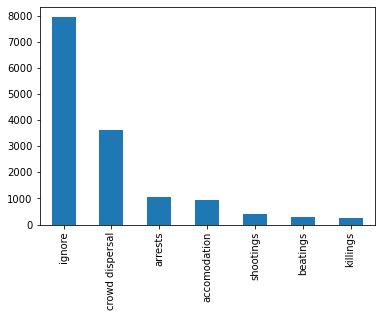

In [805]:
df['stateresponse1'].value_counts().plot.bar();

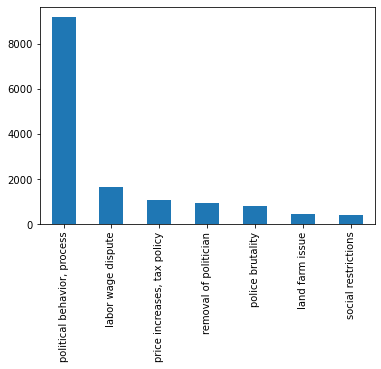

In [806]:
df['protesterdemand1'].value_counts().plot.bar();

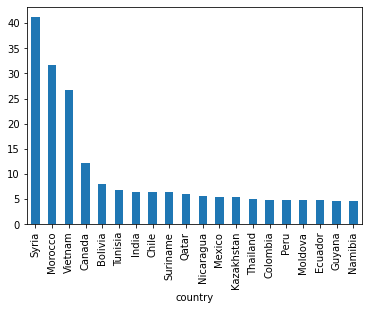

In [807]:
df.groupby('country')['total_days'].mean().sort_values(ascending=False).head(20).plot.bar();

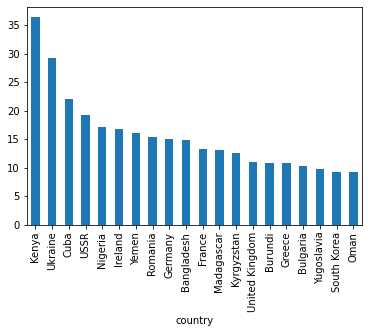

In [808]:
df.groupby('country')['protestnumber'].mean().sort_values(ascending=False).head(20).plot.bar();

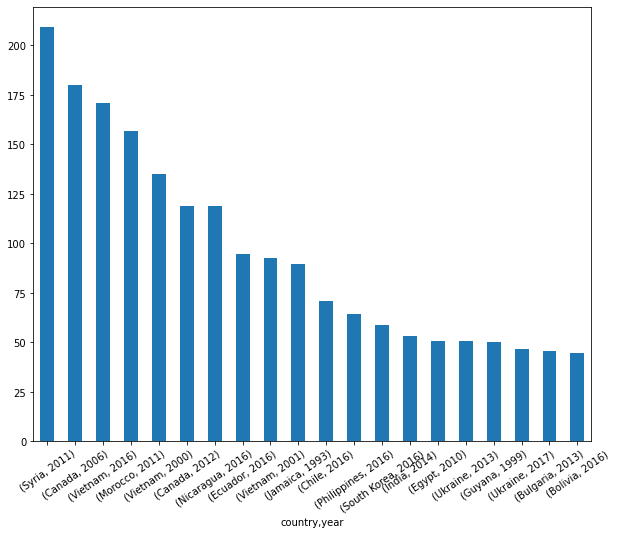

In [809]:
plt.figure(figsize=(10,8))
df.groupby(['country','year'])['total_days'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.xticks(rotation=35);

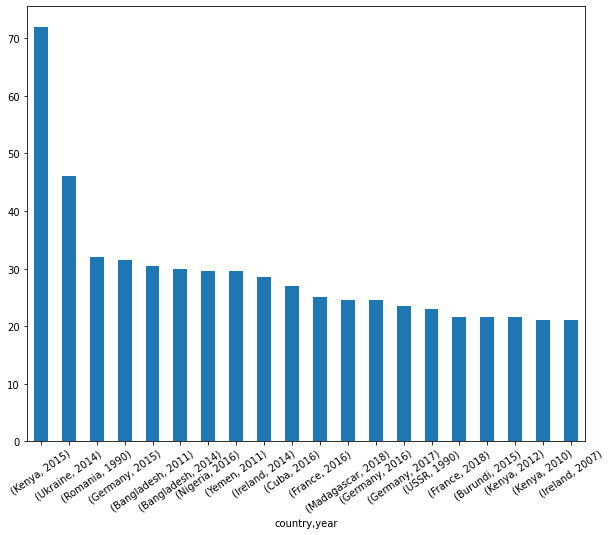

In [810]:
plt.figure(figsize=(10,8))
df.groupby(['country','year'])['protestnumber'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.xticks(rotation=35);
# format the axes and labels

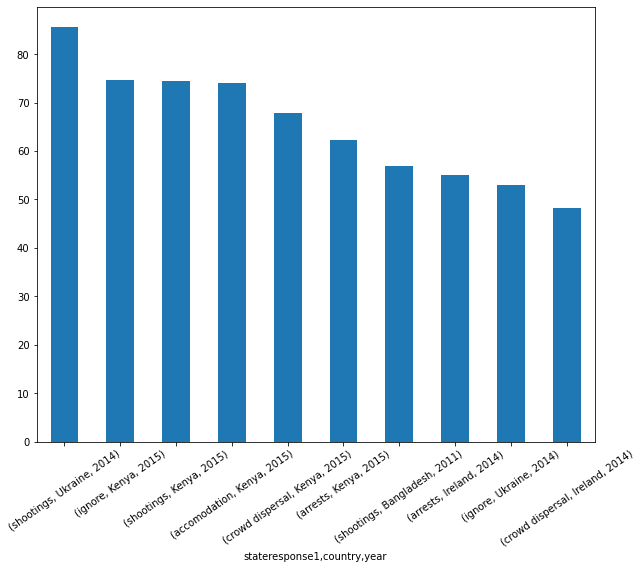

In [811]:
plt.figure(figsize=(10,8))
df.groupby(['stateresponse1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=35);

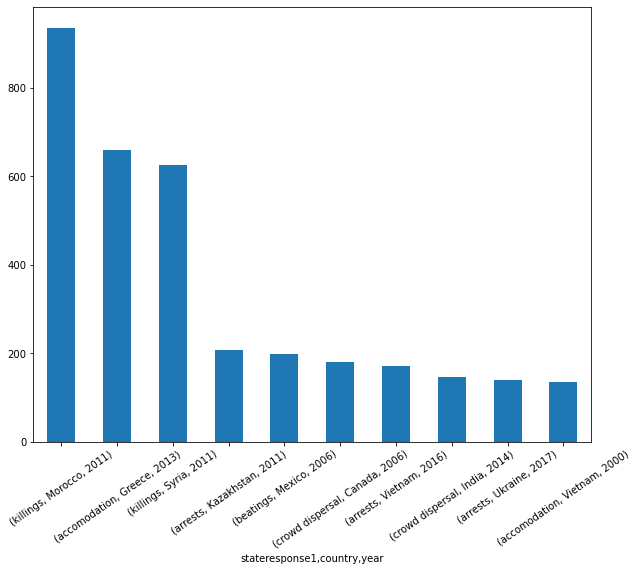

In [812]:
plt.figure(figsize=(10,8))
df.groupby(['stateresponse1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=35);

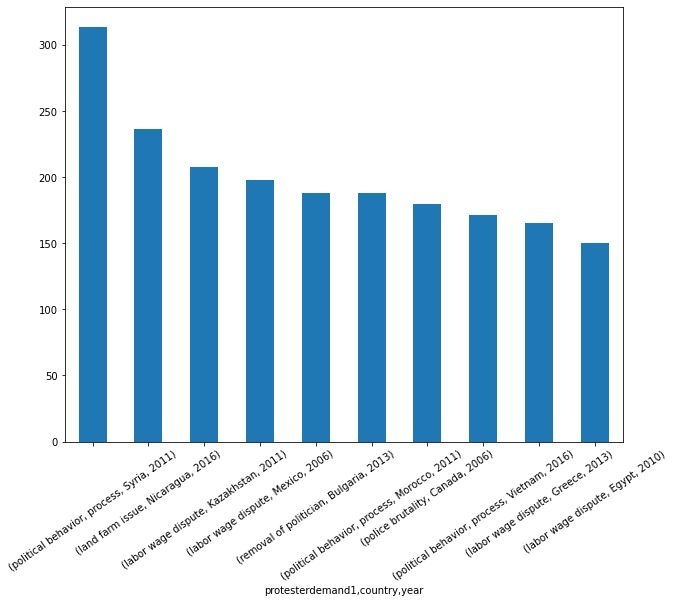

In [813]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=35);

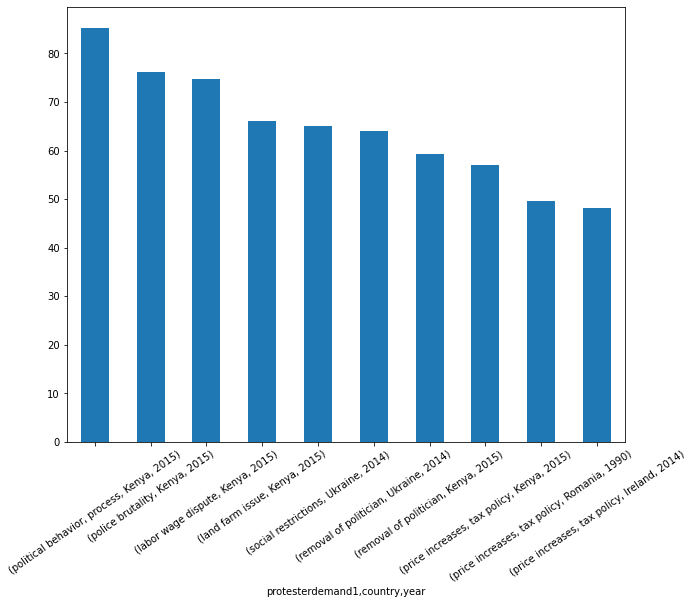

In [814]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=35);

In [815]:
df.columns

Index(['country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'years', 'months',
       'days', 'total_days', 'labor wage dispute', 'land farm issue',
       'police brutality', 'political behavior, process',
       'price increases, tax policy', 'removal of politician',
       'social restrictions', '.', 'accomodation', 'arrests', 'beatings',
       'crowd dispersal', 'ignore', 'killings', 'shootings', '.'],
      dtype='object')

In [816]:
df.groupby(['year','stateresponse1'])['protestnumber'].value_counts().head(15)#.plot.bar();

year  stateresponse1  protestnumber
1990  accomodation    2                8
                      1                7
                      5                4
                      3                3
                      4                3
                      11               3
                      20               2
                      8                1
                      9                1
                      12               1
                      13               1
                      15               1
                      16               1
                      17               1
                      28               1
Name: protestnumber, dtype: int64

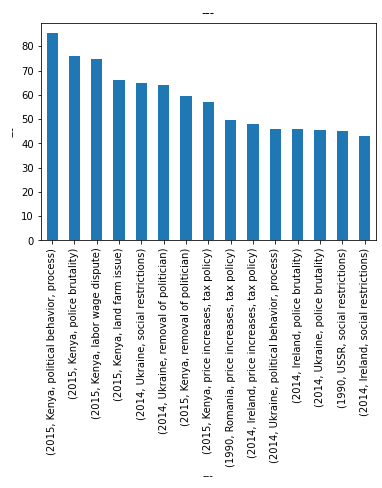

In [817]:
df.groupby(['year','country','protesterdemand1'])['protestnumber'].mean().sort_values(ascending=False).head(15).plot.bar()
plt.ylabel('---')
plt.xlabel('---')
plt.title('---');

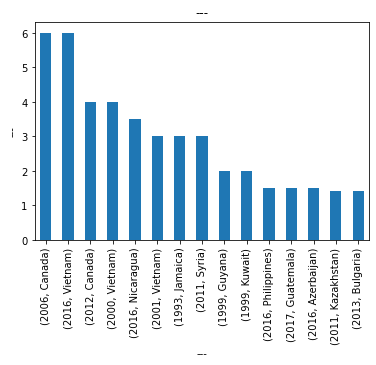

In [818]:
df.groupby(['year','country'])['months'].mean().sort_values(ascending=False).head(15).plot.bar()
plt.ylabel('---')
plt.xlabel('---')
plt.title('---');

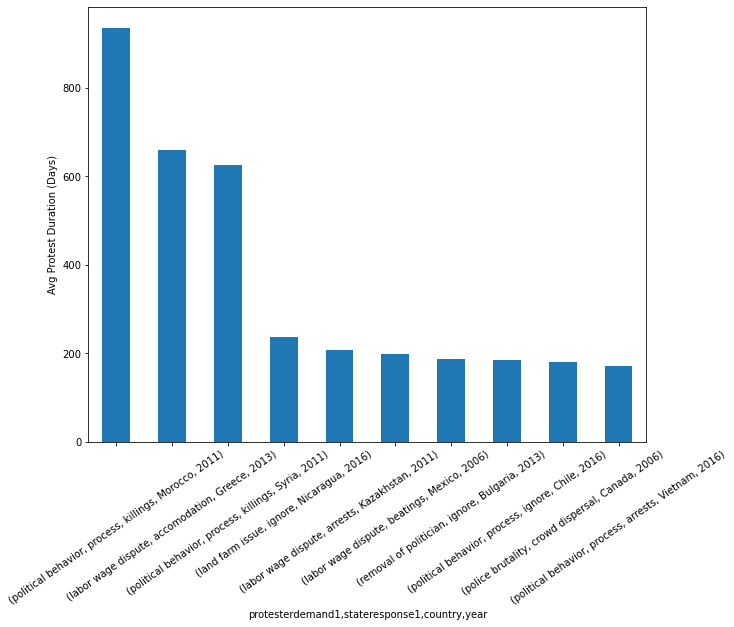

In [819]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','stateresponse1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=35)
plt.ylabel('Avg Protest Duration (Days)');

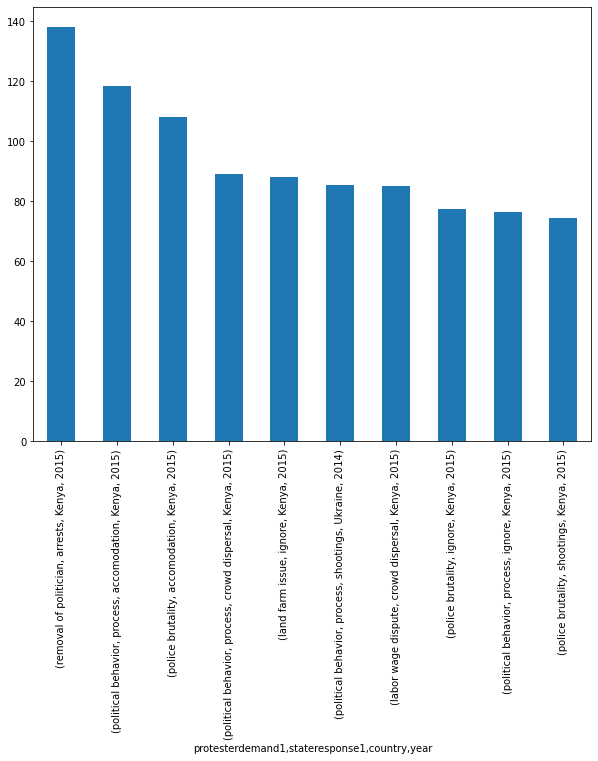

In [820]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','stateresponse1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks();

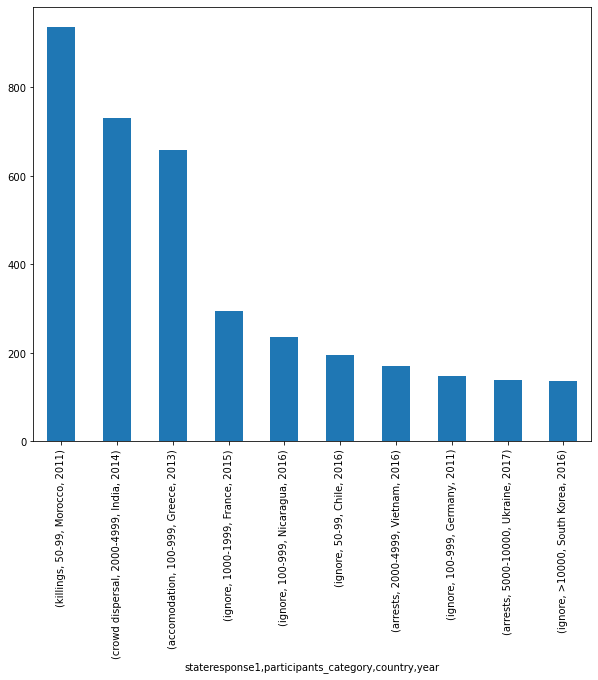

In [821]:
plt.figure(figsize=(10,8))
df.groupby(['stateresponse1','participants_category','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks();

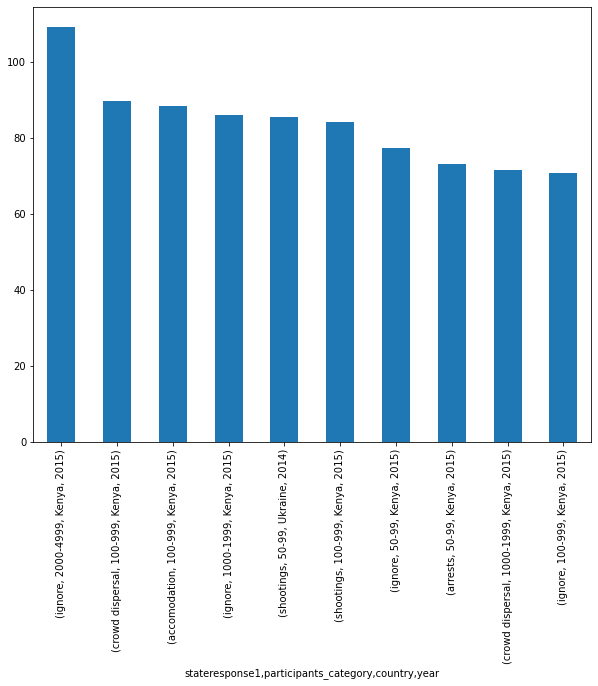

In [822]:
plt.figure(figsize=(10,8))
df.groupby(['stateresponse1','participants_category','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks();

In [823]:
df.groupby(['country','year'])['total_days'].mean().sort_values(ascending=False).head(10)

country    year
Syria      2011    209.166667
Canada     2006    180.000000
Vietnam    2016    171.000000
Morocco    2011    156.833333
Vietnam    2000    135.000000
Canada     2012    119.000000
Nicaragua  2016    118.750000
Ecuador    2016     94.500000
Vietnam    2001     92.500000
Jamaica    1993     89.500000
Name: total_days, dtype: float64

/Users/ash/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


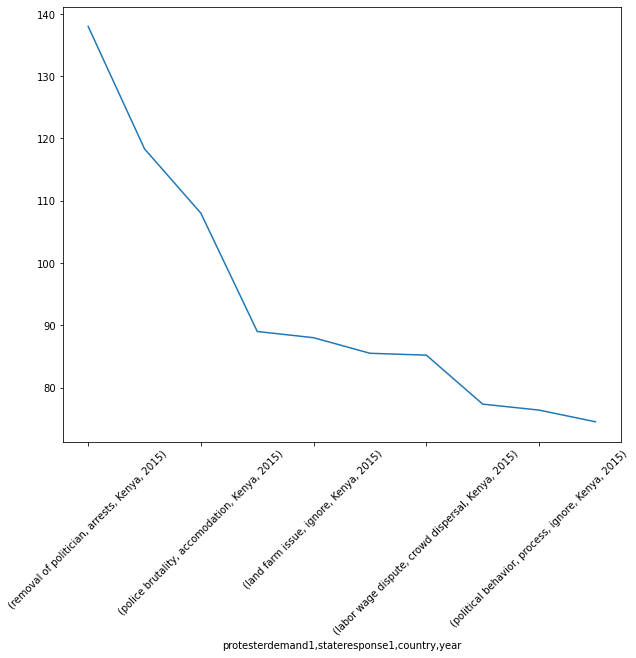

In [824]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','stateresponse1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot()
plt.xticks(rotation=45);

In [825]:
df['participants_category'].value_counts()

100-999       3011
50-99         2387
2000-4999     1485
>10000        1250
5000-10000     563
1000-1999      464
Name: participants_category, dtype: int64

In [826]:
# df['protesterdemand4'].isnull().value_counts()

In [827]:
df['participants_category'].isnull().value_counts()

False    9160
True     5354
Name: participants_category, dtype: int64

In [828]:
# df['protesterdemand1'].isnull().value_counts()

In [829]:
df['protest'].isnull().value_counts()

False    14514
Name: protest, dtype: int64

In [830]:
df['region'].value_counts()

Europe             4811
Africa             3043
Asia               2987
South America      1602
MENA               1096
North America       500
Central America     437
Oceania              38
Name: region, dtype: int64

In [831]:
df['ccode'].value_counts()

200    547
220    527
205    428
255    360
501    348
      ... 
812      2
760      2
525      1
694      1
678      1
Name: ccode, Length: 168, dtype: int64

### Processing for Models

In [832]:
df.fillna(0,inplace=True)

In [833]:
country_list = list(pd.DataFrame(df['country'].value_counts()).T.columns)

In [834]:
df['region'].value_counts()

Europe             4811
Africa             3043
Asia               2987
South America      1602
MENA               1096
North America       500
Central America     437
Oceania              38
Name: region, dtype: int64

In [835]:
# df['outcome'] = df['stateresponse1'].apply(lambda x: 1 if x == 'accomodation' else int(0))
# df['outcome'] = df['accomodation'].apply(lambda x: 1 if x == 1 else int(0))

df['accomodation'] = np.where(df['accomodation'] == 1,1,0)
df['accomodation'].value_counts()

0    13033
1     1481
Name: accomodation, dtype: int64

In [836]:
# separate DFs by region
# AH to consider asia and MENA

euro_df = df[df['region'] == 'Europe'].copy()
asia_df = df[df['region'] == 'Asia'].copy()
africa_df = df[df['region'] == 'Africa'].copy()
sa_df = df[df['region'] == 'South America'].copy()
mena_df = df[df['region'] == 'MENA'].copy()
na_df = df[df['region'] == 'North America'].copy()
ca_df = df[df['region'] == 'Central America'].copy()
oc_df = df[df['region'] == 'Oceania'].copy()

In [837]:
euro_df['accomodation'].value_counts()

0    4448
1     363
Name: accomodation, dtype: int64

In [838]:
sa_df.shape

(1602, 48)

In [839]:
# Multi-class feature arrangement - Stateresponse1 to be target

remove_features = ['ccode','startyear','endyear','startday',
                   'endday','protest','years','months','days',
                  'participants','protesteridentity','location',
                   'country','endmonth','stateresponse1',
                   'stateresponse2','stateresponse3','stateresponse4',
                   'stateresponse5','stateresponse6','stateresponse7',
                  'protesterdemand1','protesterdemand2',
                'protesterdemand3','protesterdemand4']

dummy_columns = ['region','startmonth','participants_category','year']

# dummy_columns = ['region','participants_category',
#                  'protesterdemand1','protesterdemand2',
#                 'protesterdemand3','protesterdemand4']

In [840]:
df['participants_category'].value_counts()

0             5354
100-999       3011
50-99         2387
2000-4999     1485
>10000        1250
5000-10000     563
1000-1999      464
Name: participants_category, dtype: int64

In [841]:
df['stateresponse1'].head()

0             ignore
1             ignore
2             ignore
3       accomodation
4    crowd dispersal
Name: stateresponse1, dtype: object

In [842]:
df['accomodation'] = np.where(df['accomodation'] > 0,1,0)

In [843]:
# new dataframes from original DF

model_simple = df.drop(columns=remove_features)
asia_df = asia_df.drop(columns=remove_features)
mena_df = mena_df.drop(columns=remove_features)

model_simple = pd.get_dummies(model_simple,columns=dummy_columns)
asia_df = pd.get_dummies(asia_df,columns=dummy_columns)
mena_df = pd.get_dummies(mena_df,columns=dummy_columns)

# stateresponse_codes = {'accomodation':1,'ignore':2,'arrests':3,'crowd dispersal':4,
#                        'shootings':5,'beatings':6,'killings':7}

# Map digits to target feature
# model_simple['stateresponse1'] = model_simple['stateresponse1'].map(stateresponse_codes)
# asia_df['stateresponse1'] = asia_df['stateresponse1'].map(stateresponse_codes)
# mena_df['stateresponse1'] = mena_df['stateresponse1'].map(stateresponse_codes)
# df['stateresponse1'] = df['stateresponse1'].map(stateresponse_codes)


# Removing final null values for target column
model_simple.dropna(inplace=True)
asia_df.dropna(inplace=True)
mena_df.dropna(inplace=True)
df.dropna(inplace=True)

In [844]:
model_simple['accomodation'].value_counts()

0    13033
1     1481
Name: accomodation, dtype: int64

In [845]:
df.shape

(14514, 48)

In [846]:
model_simple.isnull().sum()

protestnumber         0
protesterviolence     0
total_days            0
labor wage dispute    0
land farm issue       0
                     ..
year_2015             0
year_2016             0
year_2017             0
year_2018             0
year_2019             0
Length: 76, dtype: int64

In [847]:
model_simple.shape

(14514, 76)

In [848]:
model_simple.dropna().shape

(14514, 76)

In [849]:
model_simple.head()

,protestnumber,protesterviolence,total_days,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,.,accomodation,arrests,beatings,crowd dispersal,ignore,killings,shootings,.,region_Africa,region_Asia,region_Central America,region_Europe,region_MENA,region_North America,region_Oceania,region_South America,startmonth_1.0,startmonth_2.0,startmonth_3.0,startmonth_4.0,startmonth_5.0,startmonth_6.0,startmonth_7.0,startmonth_8.0,startmonth_9.0,startmonth_10.0,startmonth_11.0,startmonth_12.0,participants_category_0,participants_category_100-999,participants_category_1000-1999,participants_category_2000-4999,participants_category_50-99,participants_category_5000-10000,participants_category_>10000,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,1,0.0,1.0,1,0,0,1,0,0,0.0,0.0,0,0,0,0.0,1.0,0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.0,1.0,0,0,0,1,0,0,0.0,0.0,0,0,0,0.0,1.0,0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0.0,1.0,0,0,0,1,0,0,0.0,0.0,0,0,0,0.0,1.0,0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1.0,56.0,0,1,0,0,0,0,0.0,0.0,1,0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1.0,2.0,0,0,0,1,0,0,0.0,0.0,1,1,0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modeling

In [850]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [851]:
X = model_simple.drop(columns='accomodation')
y = model_simple['accomodation']

In [852]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=77)

In [853]:
# Baseline
y.value_counts(normalize=True)

0    0.897961
1    0.102039
Name: accomodation, dtype: float64

In [854]:
pipe_log = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',LogisticRegression())
])
log_params = {'pc__n_components':[10,15,20],
              'model__max_iter': [500, 1000],
              'model__C': [.1, 1, 10, 100],
              'model__solver': ['liblinear', 'lbfgs', 'sag'],
              'model__penalty': ['l2']}
logreg = GridSearchCV(pipe_log,
                     log_params,
                     cv=5,
                     verbose=1)
logreg.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   31.2s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__max_iter': [500, 1000],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'lbfgs', 'sag'],
                         'pc__n_components': [10, 15, 20]},
             verbose=1)

In [855]:
logreg.score(X_train,y_train), logreg.score(X_test,y_test)

(0.8979329352319706, 0.8977679801598236)

In [856]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [857]:
dtc.score(X_train,y_train), dtc.score(X_test,y_test)

(0.9994487827285254, 0.9228437586111876)

In [858]:
knn_params = {'n_neighbors':[3,4,5,6],
             'weights':['uniform','distance'],
             'p':[2,3,4]}

knn = GridSearchCV(KNeighborsClassifier(),
                     knn_params,
                     cv=5,
                     verbose=1)

knn.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.4min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6], 'p': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [859]:
knn.score(X_train,y_train), knn.score(X_test,y_test)

(0.9994487827285254, 0.8977679801598236)

In [860]:
# Setting up GridSearches:
# Fit Random Forest

rfc_params = {'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2'],
             'oob_score':[True,False],
             'ccp_alpha':[0.01,0.05,0.07]}

# Support Vector Classifier was modelled in different Notebook due to significant runtimes.

rfc = GridSearchCV(RandomForestClassifier(),
                     rfc_params,
                     cv=5,
                     verbose=1)

In [861]:
rfc.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.9min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.01, 0.05, 0.07],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'oob_score': [True, False]},
             verbose=1)

In [862]:
rfc.score(X_train,y_train), rfc.score(X_test,y_test)

(0.8979329352319706, 0.8980435381647837)

In [863]:
# Fit AdaBoost

ada_params = {'n_estimators':[40,50,60],
             'learning_rate':[0.5,1,1.5]}

ada = GridSearchCV(AdaBoostClassifier(),
                     ada_params,
                     cv=5,
                     verbose=1)

In [864]:
ada.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   21.5s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [40, 50, 60]},
             verbose=1)

In [865]:
ada.score(X_train,y_train), ada.score(X_test,y_test)

(0.9193385392742306, 0.918434830531827)

In [866]:
# Fit Bagger

bag_params = {'n_estimators':[10,20,30],
              'max_samples':[1,2,3],
             'warm_start':[True,False]
             }

bag = GridSearchCV(BaggingClassifier(),
                     bag_params,
                     cv=5,
                     verbose=1)

bag.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   10.2s finished


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_samples': [1, 2, 3], 'n_estimators': [10, 20, 30],
                         'warm_start': [True, False]},
             verbose=1)

In [867]:
bag.score(X_train,y_train), bag.score(X_test,y_test)

(0.8979329352319706, 0.8980435381647837)

In [868]:
svc_params = {'C':[0.01,0.05],
             'kernel':['poly','rbf'],
             'degree':[3,4,5]}

svc = GridSearchCV(SVC(),
                     svc_params,
                     cv=5,
                     verbose=1)

svc.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.5min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.05], 'degree': [3, 4, 5],
                         'kernel': ['poly', 'rbf']},
             verbose=1)

In [869]:
svc.score(X_train,y_train), svc.score(X_test,y_test)

(0.9002296738631144, 0.8985946541747037)

In [872]:
preds_lr = logreg.predict(X_test)
preds_dtc = dtc.predict(X_test)
preds_knn = knn.predict(X_test)
preds_rfc = rfc.predict(X_test)
preds_ada = ada.predict(X_test)
preds_bag = bag.predict(X_test)
preds_svc = svc.predict(X_test)

preds_dict = {'Log Reg':preds_lr,
             'Decision Tree':preds_dtc,
             'KNN':preds_knn,
             'Random Forest':preds_rfc,
             'AdaBoost':preds_ada,
             'Bagger':preds_bag,
             'SVC':preds_svc}

model_list = [logreg,dtc,knn,rfc,ada,bag,svc]

In [873]:
# Credit to Julia

def scoring_class(model, X1, y1, X2, y2):
#     model.fit(X1, y1)
    print(f'{model} train score R2: {model.score(X1, y1)}')
    print(f'{model} test score Rs: {model.score(X2, y2)}')
    print('------------------------------------------------------------------------')
    
for model in model_list:
    scoring_class(model,X_train,y_train,X_test,y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__max_iter': [500, 1000],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'lbfgs', 'sag'],
                         'pc__n_components': [10, 15, 20]},
             verbose=1) train score R2: 0.8979329352319706
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__max_iter': [500, 1000],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'lbfgs', 'sag'],
                         'pc__n_components': [10, 15, 20]},
 

### Metrics:

In [ ]:

# Produce Metrics

for key, value in preds_dict.items():
    for item in model_list:

        tn, fp, fn, tp = confusion_matrix(y_test,value).ravel()

        plot_confusion_matrix(item,X_test,y_test,cmap='Blues',
                              values_format='d')
        plt.title(f'{key} Confusion Martix')

        print(f'{key} precision: ',tp / (tp + fp))
        print(f'{key} sensitivity: ',tp / (tp + fn))
        print(f'{key} specificity: ',tn / (tn + fp))
        print(f'{key} accuracy: ', (tn + tp) / (tn + fp + fn + tp))

        plot_roc_curve(item,X_test,y_test)
        plt.plot([0,1],[0,1],label='baseline',linestyle='--')
        plt.title(f'{key} ROC Curve')
        plt.legend;

